In [1]:
from google.colab import drive
drive.mount('/content/drive')
import sys
sys.path.append('/content/drive/Shareddrives/Kaggle/Kaggle/Scripts/')
import my_utils
import pandas as pd
import numpy as np
import warnings
from my_utils import remove_miss_columns
warnings.filterwarnings('ignore')
from sklearn.preprocessing import FunctionTransformer
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})
import seaborn as sns

Mounted at /content/drive


ModuleNotFoundError: ignored

In [ ]:
!pip install miceforest

In [ ]:
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import miceforest as mf

In [ ]:
data = pd.read_csv('/content/drive/Shareddrives/Kaggle/Kaggle/Data/train_data.csv')
data2 = pd.read_csv('/content/drive/Shareddrives/Kaggle/Kaggle/Data/test_data.csv')

## location rounding issue

In [ ]:
# Concatenate train and test data
all = pd.concat([data, data2], axis=0)

# Create new feature
all['loc_group'] = all.groupby(['lat','lon']).ngroup()
display(all)

print(f'{all.loc_group.nunique()} unique locations')

# Split back up
data = all.iloc[:len(data)]
data2 = all.iloc[len(data):]

,index,lat,lon,startdate,contest-pevpr-sfc-gauss-14d__pevpr,nmme0-tmp2m-34w__cancm30,nmme0-tmp2m-34w__cancm40,nmme0-tmp2m-34w__ccsm30,nmme0-tmp2m-34w__ccsm40,nmme0-tmp2m-34w__cfsv20,...,wind-vwnd-925-2010-12,wind-vwnd-925-2010-13,wind-vwnd-925-2010-14,wind-vwnd-925-2010-15,wind-vwnd-925-2010-16,wind-vwnd-925-2010-17,wind-vwnd-925-2010-18,wind-vwnd-925-2010-19,wind-vwnd-925-2010-20,loc_group
0,0,0.0,0.833333,9/1/14,237.00,29.02,31.64,29.57,30.73,29.71,...,-37.21,8.32,9.56,-2.03,48.13,28.09,-13.50,11.90,4.58,0
1,1,0.0,0.833333,9/2/14,228.90,29.02,31.64,29.57,30.73,29.71,...,-36.57,8.77,21.17,4.44,48.60,27.41,-23.77,15.44,3.42,0
2,2,0.0,0.833333,9/3/14,220.69,29.02,31.64,29.57,30.73,29.71,...,-34.16,6.99,32.16,5.01,48.53,19.21,-33.16,15.11,4.82,0
3,3,0.0,0.833333,9/4/14,225.28,29.02,31.64,29.57,30.73,29.71,...,-31.04,6.17,39.66,-1.41,50.59,8.29,-37.22,18.24,9.74,0
4,4,0.0,0.833333,9/5/14,237.24,29.02,31.64,29.57,30.73,29.71,...,-31.80,7.47,38.62,-5.21,54.73,-2.58,-42.30,21.91,10.95,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31349,407083,1.0,0.866667,12/27/22,62.72,4.60,8.71,6.05,10.08,6.39,...,-8.49,32.39,38.82,7.42,11.75,-23.62,-0.24,-5.94,51.23,574
31350,407084,1.0,0.866667,12/28/22,73.41,4.60,8.71,6.05,10.08,6.39,...,0.83,26.23,37.64,13.01,17.84,-22.05,-3.03,1.31,51.45,574
31351,407085,1.0,0.866667,12/29/22,70.00,4.60,8.71,6.05,10.08,6.39,...,10.90,21.06,36.53,14.15,23.12,-25.60,-5.88,9.32,45.32,574
31352,407086,1.0,0.866667,12/30/22,79.81,4.60,8.71,6.05,10.08,6.39,...,21.37,20.42,36.05,6.38,29.00,-27.06,-1.42,16.06,31.88,574


575 unique locations


In [ ]:
print('Locations in train that are not in test')
print([c for c in data.loc_group.unique() if c not in data2.loc_group.unique()])

print('Locations in test that are not in train')
print([c for c in data2.loc_group.unique() if c not in data.loc_group.unique()])

Locations in train that are not in test
[33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 76, 101, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 181, 210, 239, 269, 300, 330, 360, 389, 418, 447, 475, 504, 533, 559]
Locations in test that are not in train
[52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 75, 100, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 180, 209, 238, 268, 299, 329, 359, 388, 417, 446, 474, 503, 532, 558]


In [ ]:
scale = 14

data.loc[:,'lat']=round(data.lat,scale)
data.loc[:,'lon']=round(data.lon,scale)

data2.loc[:,'lat']=round(data2.lat,scale)
data2.loc[:,'lon']=round(data2.lon,scale)

# Concatenate train and test data
all = pd.concat([data, data2], axis=0)

# Create new feature
all['loc_group'] = all.groupby(['lat','lon']).ngroup()
display(all)

print(f'{all.loc_group.nunique()} unique locations')

# Split back up
data = all.iloc[:len(data)]
data2 = all.iloc[len(data):]

print('Locations in train that are not in test')
print([c for c in data.loc_group.unique() if c not in data2.loc_group.unique()])

print('Locations in test that are not in train')
print([c for c in data2.loc_group.unique() if c not in data.loc_group.unique()])

,index,lat,lon,startdate,contest-pevpr-sfc-gauss-14d__pevpr,nmme0-tmp2m-34w__cancm30,nmme0-tmp2m-34w__cancm40,nmme0-tmp2m-34w__ccsm30,nmme0-tmp2m-34w__ccsm40,nmme0-tmp2m-34w__cfsv20,...,wind-vwnd-925-2010-12,wind-vwnd-925-2010-13,wind-vwnd-925-2010-14,wind-vwnd-925-2010-15,wind-vwnd-925-2010-16,wind-vwnd-925-2010-17,wind-vwnd-925-2010-18,wind-vwnd-925-2010-19,wind-vwnd-925-2010-20,loc_group
0,0,0.0,0.833333,9/1/14,237.00,29.02,31.64,29.57,30.73,29.71,...,-37.21,8.32,9.56,-2.03,48.13,28.09,-13.50,11.90,4.58,0
1,1,0.0,0.833333,9/2/14,228.90,29.02,31.64,29.57,30.73,29.71,...,-36.57,8.77,21.17,4.44,48.60,27.41,-23.77,15.44,3.42,0
2,2,0.0,0.833333,9/3/14,220.69,29.02,31.64,29.57,30.73,29.71,...,-34.16,6.99,32.16,5.01,48.53,19.21,-33.16,15.11,4.82,0
3,3,0.0,0.833333,9/4/14,225.28,29.02,31.64,29.57,30.73,29.71,...,-31.04,6.17,39.66,-1.41,50.59,8.29,-37.22,18.24,9.74,0
4,4,0.0,0.833333,9/5/14,237.24,29.02,31.64,29.57,30.73,29.71,...,-31.80,7.47,38.62,-5.21,54.73,-2.58,-42.30,21.91,10.95,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31349,407083,1.0,0.866667,12/27/22,62.72,4.60,8.71,6.05,10.08,6.39,...,-8.49,32.39,38.82,7.42,11.75,-23.62,-0.24,-5.94,51.23,513
31350,407084,1.0,0.866667,12/28/22,73.41,4.60,8.71,6.05,10.08,6.39,...,0.83,26.23,37.64,13.01,17.84,-22.05,-3.03,1.31,51.45,513
31351,407085,1.0,0.866667,12/29/22,70.00,4.60,8.71,6.05,10.08,6.39,...,10.90,21.06,36.53,14.15,23.12,-25.60,-5.88,9.32,45.32,513
31352,407086,1.0,0.866667,12/30/22,79.81,4.60,8.71,6.05,10.08,6.39,...,21.37,20.42,36.05,6.38,29.00,-27.06,-1.42,16.06,31.88,513


514 unique locations
Locations in train that are not in test
[]
Locations in test that are not in train
[]


In [ ]:
data.to_csv('/content/drive/Shareddrives/Kaggle/Kaggle/Data/train_raw.csv',index=False)
data2.to_csv('/content/drive/Shareddrives/Kaggle/Kaggle/Data/test_raw.csv',index=False)

## NA Handling

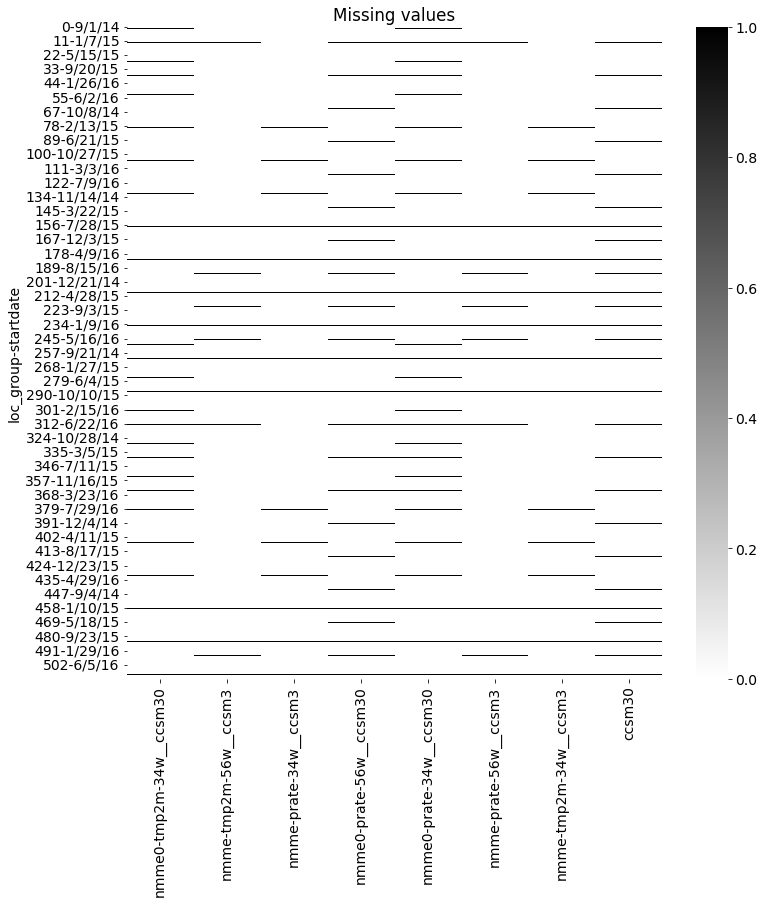

In [ ]:
cols_with_missing = list(data.isnull().sum(axis=0)[data.isnull().sum(axis=0) > 0].index)

fig, ax = plt.subplots(1,1,figsize=(12,12))
sns.heatmap(data.set_index([ 'loc_group', 'startdate'])[cols_with_missing].isnull(), cmap='binary')
ax.set_title('Missing values')
plt.show()

In [ ]:
round(data.isnull().sum()*100/len(data),2).sort_values(ascending=False)[:10]

nmme0-prate-34w__ccsm30    4.24
nmme0-tmp2m-34w__ccsm30    4.24
ccsm30                     4.24
nmme0-prate-56w__ccsm30    4.24
nmme-tmp2m-56w__ccsm3      2.74
nmme-prate-56w__ccsm3      2.74
nmme-tmp2m-34w__ccsm3      2.33
nmme-prate-34w__ccsm3      2.33
icec-2010-6                0.00
wind-hgt-500-2010-5        0.00
dtype: float64

In [ ]:
dataknn = data.copy()
missing_cols = dataknn.columns[dataknn.isnull().any()].tolist()
# First, use KNN imputation to fill in missing values in the first column
imputer1 = KNNImputer(n_neighbors=5)
dataknn[missing_cols[0]] = imputer1.fit_transform(dataknn[[missing_cols[0]]])

# Then, use iterative imputation to fill in missing values in the second and third columns
imputer2 = IterativeImputer()
for col in missing_cols[1:]:
    dataknn[col] = imputer2.fit_transform(dataknn[[col]])


In [ ]:
object_cols = data.select_dtypes(include=['object']).columns.tolist()
print(object_cols)

['startdate', 'climateregions__climateregion']


In [ ]:
data['climateregions__climateregion'] = data['climateregions__climateregion'].astype('category')
datamice = data.drop('startdate', axis=1)


In [ ]:
# Create kernels. 
kernel = mf.ImputationKernel(
  data=datamice,
  save_all_iterations=True,
  random_state=1991
)

# Run the MICE algorithm for 3 iterations on each of the datasets
kernel.mice(3,verbose=True)

Initialized logger with name mice 1-3
Dataset 0
1  | nmme-tmp2m-34w__ccsm3 | nmme-prate-34w__ccsm3 | nmme-prate-56w__ccsm3 | nmme-tmp2m-56w__ccsm3 | nmme0-prate-34w__ccsm30 | nmme0-prate-56w__ccsm30 | nmme0-tmp2m-34w__ccsm30 | ccsm30
2  | nmme-tmp2m-34w__ccsm3 | nmme-prate-34w__ccsm3 | nmme-prate-56w__ccsm3 | nmme-tmp2m-56w__ccsm3 | nmme0-prate-34w__ccsm30 | nmme0-prate-56w__ccsm30 | nmme0-tmp2m-34w__ccsm30 | ccsm30
3  | nmme-tmp2m-34w__ccsm3 | nmme-prate-34w__ccsm3 | nmme-prate-56w__ccsm3 | nmme-tmp2m-56w__ccsm3 | nmme0-prate-34w__ccsm30 | nmme0-prate-56w__ccsm30 | nmme0-tmp2m-34w__ccsm30 | ccsm30


In [ ]:
# Make a multiple imputed dataset with our new data
datamice = kernel.impute_new_data(datamice)
# Return a completed dataset
datamice = datamice.complete_data(0)

In [ ]:
#test1 = data.drop(['nmme0-prate-34w__ccsm30','nmme0-tmp2m-34w__ccsm30','ccsm30','nmme0-prate-56w__ccsm30','nmme-tmp2m-56w__ccsm3','nmme-prate-56w__ccsm3','nmme-tmp2m-34w__ccsm3','nmme-prate-34w__ccsm3'],axis = 1, inplace=False)

### Time engineering

#### For dataknn & testdata

In [ ]:
dataknn.startdate = pd.to_datetime(dataknn.startdate)
data2.startdate = pd.to_datetime(data2.startdate)

In [ ]:
def create_time_features(df):
    df = df.copy()
    #df['year'] = df.startdate.dt.year
    df['quarter'] = df.startdate.dt.quarter
    df['month'] = df.startdate.dt.month
    df['week'] = df.startdate.dt.weekofyear
    df['dayofyear'] = df.startdate.dt.day_of_year
    return df

train_df = create_time_features(dataknn)
test_df = create_time_features(data2)
train_df.head()

,index,lat,lon,startdate,contest-pevpr-sfc-gauss-14d__pevpr,nmme0-tmp2m-34w__cancm30,nmme0-tmp2m-34w__cancm40,nmme0-tmp2m-34w__ccsm30,nmme0-tmp2m-34w__ccsm40,nmme0-tmp2m-34w__cfsv20,...,wind-vwnd-925-2010-16,wind-vwnd-925-2010-17,wind-vwnd-925-2010-18,wind-vwnd-925-2010-19,wind-vwnd-925-2010-20,loc_group,quarter,month,week,dayofyear
0,0,0.0,0.833333,2014-09-01,237.00,29.02,31.64,29.57,30.73,29.71,...,48.13,28.09,-13.50,11.90,4.58,0,3,9,36,244
1,1,0.0,0.833333,2014-09-02,228.90,29.02,31.64,29.57,30.73,29.71,...,48.60,27.41,-23.77,15.44,3.42,0,3,9,36,245
2,2,0.0,0.833333,2014-09-03,220.69,29.02,31.64,29.57,30.73,29.71,...,48.53,19.21,-33.16,15.11,4.82,0,3,9,36,246
3,3,0.0,0.833333,2014-09-04,225.28,29.02,31.64,29.57,30.73,29.71,...,50.59,8.29,-37.22,18.24,9.74,0,3,9,36,247
4,4,0.0,0.833333,2014-09-05,237.24,29.02,31.64,29.57,30.73,29.71,...,54.73,-2.58,-42.30,21.91,10.95,0,3,9,36,248


In [ ]:
# Copied from https://colab.research.google.com/drive/10r73mOp1R7cORfeuP97V65a-rgwGyfWr?usp=sharing#scrollTo=c9ZkVb2aU-S7

def add_season(df):
    month_to_season = {
      1: 0,
      2: 0,
      3: 1,
      4: 1,
      5: 1,
      6: 2,
      7: 2,
      8: 2, 
      9: 3, 
      10: 3,
      11: 3,
      12: 0
  }
    df['season'] = df['month'].apply(lambda x: month_to_season[x])

add_season(train_df)
add_season(test_df)

In [ ]:
# Copied from https://colab.research.google.com/drive/10r73mOp1R7cORfeuP97V65a-rgwGyfWr?usp=sharing#scrollTo=c9ZkVb2aU-S7

def sin_transformer(period):
    return FunctionTransformer(lambda x: np.sin(x / period * 2 * np.pi))


def cos_transformer(period):
    return FunctionTransformer(lambda x: np.cos(x / period * 2 * np.pi))

def encode_cyclical(df):
    # encode the day with a period of 365
    df['day_of_year_sin'] = sin_transformer(365).fit_transform(df['dayofyear'])
    df['day_of_year_cos'] = cos_transformer(365).fit_transform(df['dayofyear'])

    # encode the week with a period of 52
    df['week_sin'] = sin_transformer(52).fit_transform(df['week'])
    df['week_cos'] = cos_transformer(52).fit_transform(df['week'])

    # encode the month with a period of 12
    df['month_sin'] = sin_transformer(12).fit_transform(df['month'])
    df['month_cos'] = cos_transformer(12).fit_transform(df['month'])

    # encode the season with a period of 4
    df['season_sin'] = sin_transformer(4).fit_transform(df['season'])
    df['season_cos'] = cos_transformer(4).fit_transform(df['season'])
    
    # encode the quarter with a period of 4
    df['quarter_sin'] = sin_transformer(4).fit_transform(df['quarter'])
    df['quarter_cos'] = cos_transformer(4).fit_transform(df['quarter'])

encode_cyclical(train_df)
encode_cyclical(test_df)

In [ ]:
# train_df.to_csv('/content/drive/Shareddrives/Kaggle/Kaggle/Data/trainknn.csv')
# test_df.to_csv('/content/drive/Shareddrives/Kaggle/Kaggle/Data/true_test.csv')

#### For datamice

In [ ]:
datamice['startdate'] = data['startdate']
datamice.startdate = pd.to_datetime(datamice.startdate)

In [ ]:
train_df2 = create_time_features(datamice)
train_df2.head()
add_season(train_df2)
encode_cyclical(train_df2)

### One hot encode for test, training *2

In [ ]:
one_hotknn = pd.get_dummies(train_df['climateregions__climateregion'])
one_hottest = pd.get_dummies(test_df['climateregions__climateregion'])
one_hotmice = pd.get_dummies(train_df2['climateregions__climateregion'])

### Test

### One hot, delete year..., delete index and climate

In [ ]:
test_all = test_df.drop(['startdate','loc_group', 'quarter', 'month', 'week', 'dayofyear', 'season','climateregions__climateregion','index'],axis = 1, inplace=False)
features = one_hottest.columns
test_all[features] = one_hottest[features]     

In [ ]:
test_all.to_csv('/content/drive/Shareddrives/Kaggle/Kaggle/Data/test_all.csv')

#### Not one hot, delete year...., keep index and climate

In [ ]:
test_region = test_df.drop(['startdate','loc_group', 'quarter', 'month', 'week', 'dayofyear', 'season'],axis = 1, inplace=False)

In [ ]:
test_region.to_csv('/content/drive/Shareddrives/Kaggle/Kaggle/Data/test_region.csv')

### Training

#### Trainknn: one hot, delete year..., delete index and climate

In [ ]:
trainknn_all = train_df.drop(['startdate','loc_group', 'quarter', 'month', 'week', 'dayofyear', 'season','climateregions__climateregion','index'],axis = 1, inplace=False)
features = one_hotknn.columns
trainknn_all[features] = one_hotknn[features]   

In [ ]:
trainknn_all.to_csv('/content/drive/Shareddrives/Kaggle/Kaggle/Data/trainknn_all.csv')

#### Trainknn: Not one hot, delete year...., keep index and climate

In [ ]:
trainknn_region = train_df.drop(['startdate','loc_group', 'quarter', 'month', 'week', 'dayofyear', 'season'],axis = 1, inplace=False)

In [ ]:
trainknn_region.to_csv('/content/drive/Shareddrives/Kaggle/Kaggle/Data/trainknn_region.csv')

#### Trainmice: one hot, delete year..., delete index and climate

In [ ]:
trainmice_all = train_df2.drop(['startdate','loc_group', 'quarter', 'month', 'week', 'dayofyear', 'season','climateregions__climateregion','index'],axis = 1, inplace=False)
features = one_hotmice.columns
trainmice_all[features] = one_hotmice[features]   

In [ ]:
trainmice_all.to_csv('/content/drive/Shareddrives/Kaggle/Kaggle/Data/trainmice_all.csv')

#### Trainmice: Not one hot, delete year...., keep index and climate

In [ ]:
trainmice_region = train_df2.drop(['startdate','loc_group', 'quarter', 'month', 'week', 'dayofyear', 'season'],axis = 1, inplace=False)

In [ ]:
trainmice_region.to_csv('/content/drive/Shareddrives/Kaggle/Kaggle/Data/trainmice_region.csv')